In [119]:
# Importing libraries and dependencies
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

%matplotlib inline

### Getting the California Housing Prices Dataset

In [2]:
!wget https://raw.githubusercontent.com/alexeygrigorev/datasets/master/housing.csv

--2023-09-26 16:57:58--  https://raw.githubusercontent.com/alexeygrigorev/datasets/master/housing.csv
Resolving raw.githubusercontent.com (raw.githubusercontent.com)... 185.199.108.133, 185.199.109.133, 185.199.110.133, ...
Connecting to raw.githubusercontent.com (raw.githubusercontent.com)|185.199.108.133|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 1423529 (1.4M) [text/plain]
Saving to: ‘housing.csv.1’

housing.csv.1       100%[===================>]   1.36M  --.-KB/s    in 0.02s   

2023-09-26 16:57:58 (68.8 MB/s) - ‘housing.csv.1’ saved [1423529/1423529]



In [120]:
# Imporing Dataset
PATH = "./housing.csv"
df = pd.read_csv(PATH)

In [121]:
df.shape

(20640, 10)

In [122]:
df.head()

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value,ocean_proximity
0,-122.23,37.88,41.0,880.0,129.0,322.0,126.0,8.3252,452600.0,NEAR BAY
1,-122.22,37.86,21.0,7099.0,1106.0,2401.0,1138.0,8.3014,358500.0,NEAR BAY
2,-122.24,37.85,52.0,1467.0,190.0,496.0,177.0,7.2574,352100.0,NEAR BAY
3,-122.25,37.85,52.0,1274.0,235.0,558.0,219.0,5.6431,341300.0,NEAR BAY
4,-122.25,37.85,52.0,1627.0,280.0,565.0,259.0,3.8462,342200.0,NEAR BAY


### Exploratory Data Analysis

Distribution of median_house_value

<Axes: xlabel='median_house_value', ylabel='Count'>

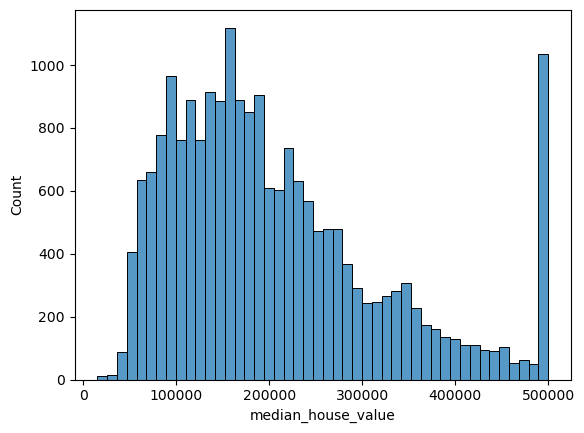

In [123]:
sns.histplot(df['median_house_value'])

<Axes: xlabel='median_house_value', ylabel='Count'>

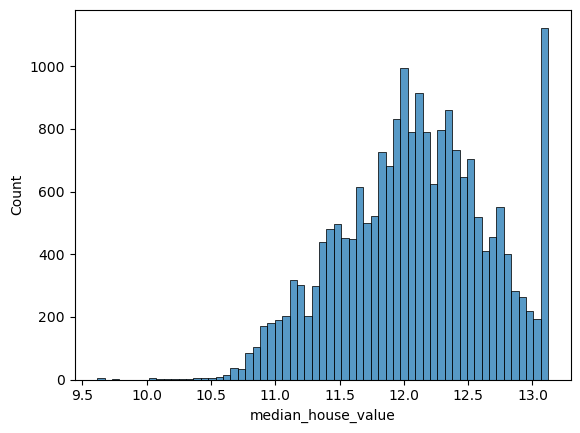

In [124]:
sns.histplot(np.log1p(df['median_house_value']))

### Data Preparation

In [125]:
df['ocean_proximity'].value_counts()

<1H OCEAN     9136
INLAND        6551
NEAR OCEAN    2658
NEAR BAY      2290
ISLAND           5
Name: ocean_proximity, dtype: int64

In [126]:
df = df[(df['ocean_proximity'] ==  'INLAND') | (df['ocean_proximity'] ==  '<1H OCEAN')]

In [127]:
df.columns

Index(['longitude', 'latitude', 'housing_median_age', 'total_rooms',
       'total_bedrooms', 'population', 'households', 'median_income',
       'median_house_value', 'ocean_proximity'],
      dtype='object')

In [128]:
column_to_drop = 'ocean_proximity'
new_df = df.drop(column_to_drop, axis=1)
new_df.head()

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value
701,-121.97,37.64,32.0,1283.0,194.0,485.0,171.0,6.0574,431000.0
830,-121.99,37.61,9.0,3666.0,711.0,2341.0,703.0,4.6458,217000.0
859,-121.97,37.57,21.0,4342.0,783.0,2172.0,789.0,4.6146,247600.0
860,-121.96,37.58,15.0,3575.0,597.0,1777.0,559.0,5.7192,283500.0
861,-121.98,37.58,20.0,4126.0,1031.0,2079.0,975.0,3.6832,216900.0


### Question 1: There's one feature with missing values. What is it?

In [130]:
new_df.isnull().sum()

longitude               0
latitude                0
housing_median_age      0
total_rooms             0
total_bedrooms        157
population              0
households              0
median_income           0
median_house_value      0
dtype: int64

In [131]:
print(f"The column(s) in the dataset with missing values is: {df.columns[df.isnull().any()][0]} ")

The column(s) in the dataset with missing values is: total_bedrooms 


### Question 2: What's the median (50% percentile) for variable 'population'?

In [132]:
np.median(new_df['population'])

1195.0

In [133]:
pop_median = new_df.population.median()
print(f"The median value of the population is: {pop_median} ")

The median value of the population is: 1195.0 


### Prepare and Split the Dataset

In [135]:
# Splitting the Dataset
n = len(new_df)
n_val = int(n * 0.2)
n_test = int(n * 0.2)
n_train = n - n_val - n_test

# Shuffling the Dataset
idx = np.arange(n)
np.random.seed(42)
np.random.shuffle(idx)


In [136]:
#Preparing the dataset
df_train = new_df.iloc[idx[:n_train]].copy()
df_val = new_df.iloc[idx[n_train:n_train+n_val]].copy()
df_test = new_df.iloc[idx[n_train+n_val:]].copy()

In [137]:
df_train.head()

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value
19963,-119.14,36.23,22.0,2935.0,523.0,1927.0,530.0,2.5875,70400.0
5929,-117.79,34.12,16.0,2426.0,426.0,1319.0,446.0,4.8125,224500.0
11377,-117.97,33.68,26.0,3653.0,568.0,1930.0,585.0,5.7301,260900.0
6443,-118.03,34.10,32.0,2668.0,609.0,1512.0,541.0,2.9422,233100.0
17546,-121.87,37.34,39.0,2479.0,541.0,1990.0,506.0,2.4306,289100.0


In [138]:
df_train = df_train.reset_index(drop=True)
df_val = df_val.reset_index(drop=True)
df_test = df_test.reset_index(drop=True)

In [139]:
# Preparing the Labels
y_train = np.log1p(df_train['median_house_value'].values) 
y_val = np.log1p(df_val['median_house_value'].values)
y_test = np.log1p(df_test['median_house_value'].values)

In [140]:
len(y_train), len(y_val), len(y_test)

(9413, 3137, 3137)

In [141]:
# Deleting the y column
del df_train['median_house_value']
del df_val['median_house_value']
del df_test['median_house_value']

In [142]:
df_train.head()

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income
0,-119.14,36.23,22.0,2935.0,523.0,1927.0,530.0,2.5875
1,-117.79,34.12,16.0,2426.0,426.0,1319.0,446.0,4.8125
2,-117.97,33.68,26.0,3653.0,568.0,1930.0,585.0,5.7301
3,-118.03,34.10,32.0,2668.0,609.0,1512.0,541.0,2.9422
4,-121.87,37.34,39.0,2479.0,541.0,1990.0,506.0,2.4306


### Question 3

- We need to deal with missing values for the column from Q1.
- We have two options: fill it with 0 or with the mean of this variable.
- Try both options. For each, train a linear regression model without regularization using the code from the lessons.
- For computing the mean, use the training only!
- Use the validation dataset to evaluate the models and compare the RMSE of each option.
- Round the RMSE scores to 2 decimal digits using round(score, 2)
- Which option gives better RMSE?

In [147]:
columns = ["longitude", "latitude", "housing_median_age", "total_rooms", "total_bedrooms", 
       "population", "households", "median_income"]

In [148]:
def prepare_X(df, fillna_value):
    df_num = df[columns]
    df_num = df_num.fillna(fillna_value)
    X = df_num.values
    return X

In [149]:
def train_linear_regression(X, y):
    ones = np.ones(X.shape[0])
    X = np.column_stack([ones, X])

    XTX = X.T.dot(X)
    XTX_inv = np.linalg.inv(XTX)
    w_full = XTX_inv.dot(X.T).dot(y)
    
    return w_full[0], w_full[1:]

In [150]:
def rmse(y, y_pred):
    se = (y - y_pred) ** 2
    mse = se.mean()
    return np.sqrt(mse)

Approach 1: Fill the missing values for the column `total_bedrooms` with 0

In [59]:
df_val[df_val['total_bedrooms'].isnull()]

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income
110,-118.19,33.98,36.0,4179.0,NaN,4582.0,1196.0,2.0087
255,-119.15,36.29,18.0,1435.0,NaN,657.0,254.0,2.4281
333,-117.01,32.74,31.0,3473.0,NaN,2098.0,677.0,2.6973
342,-118.36,33.96,26.0,3543.0,NaN,2742.0,951.0,2.5504
705,-119.46,35.14,30.0,2943.0,NaN,1565.0,584.0,2.5313
771,-121.44,38.54,39.0,2855.0,NaN,1217.0,562.0,3.2404
831,-117.65,34.04,15.0,3393.0,NaN,2039.0,611.0,3.9336
886,-117.91,33.76,20.0,4413.0,NaN,4818.0,1063.0,2.8594
922,-124.13,40.55,38.0,544.0,NaN,240.0,91.0,3.2500
982,-118.32,34.09,44.0,2666.0,NaN,2297.0,726.0,1.6760


In [151]:
# Filling Missing Values with 0
X_null_train = prepare_X(df_train, 0)
w0_null, w_null = train_linear_regression(X_null_train, y_train)

X_null_val = prepare_X(df_val, 0)
y_null_pred_val = w0_null + X_null_val.dot(w_null)
score = rmse(y_val, y_null_pred_val)
round(score,2)

0.34

Approach 2: Fill the missing values for the column `total_bedrooms` with mean value from the training dataset

In [153]:
# Filling Missing Values with mean
mean = df_train['total_bedrooms'].mean()

X_mean_train = prepare_X(df_train,mean)
w0_mean, w_mean = train_linear_regression(X_mean_train, y_train)

X_mean_val = prepare_X(df_val,mean)
y_mean_pred_val = w0_mean + X_mean_val.dot(w_mean)
score = rmse(y_val, y_mean_pred_val)
round(score,2)

0.34

Both options seem equally good in this case

### Question 4

- Now let's train a regularized linear regression.
- For this question, fill the NAs with 0.
- Try different values of r from this list: [0, 0.000001, 0.0001, 0.001, 0.01, 0.1, 1, 5, 10].
- Use RMSE to evaluate the model on the validation dataset.
- Round the RMSE scores to 2 decimal digits.
- Which r gives the best RMSE?

In [154]:
def train_linear_regression_reg(X, y, r=0.001):
    ones = np.ones(X.shape[0])
    X = np.column_stack([ones, X])

    XTX = X.T.dot(X)
    XTX = XTX + r * np.eye(XTX.shape[0])

    XTX_inv = np.linalg.inv(XTX)
    w_full = XTX_inv.dot(X.T).dot(y)
    
    return w_full[0], w_full[1:]

In [156]:
for r in [0, 0.000001, 0.0001, 0.001, 0.01, 0.1, 1, 5, 10]:
    w0, w = train_linear_regression_reg(X_null_train, y_train, r=r)
    y_pred = w0 + X_null_val.dot(w)
    score = rmse(y_val, y_pred)

    print(f"r: {r}, rmse: {round(score,2)} ")

r: 0, rmse: 0.34 
r: 1e-06, rmse: 0.34 
r: 0.0001, rmse: 0.34 
r: 0.001, rmse: 0.34 
r: 0.01, rmse: 0.34 
r: 0.1, rmse: 0.34 
r: 1, rmse: 0.34 
r: 5, rmse: 0.35 
r: 10, rmse: 0.35 


Answer is 0

### Question 5

- We used seed 42 for splitting the data. Let's find out how selecting the seed influences our score.
- Try different seed values: [0, 1, 2, 3, 4, 5, 6, 7, 8, 9].
- For each seed, do the train/validation/test split with 60%/20%/20% distribution.
- Fill the missing values with 0 and train a model without regularization.
- For each seed, evaluate the model on the validation dataset and collect the RMSE scores.
- What's the standard deviation of all the scores? To compute the standard deviation, use np.std.
- Round the result to 3 decimal digits (round(std, 3))


In [74]:
n

15687

In [77]:
n_train,n_val,n_test

(9413, 3137, 3137)

In [157]:
def split_train_df_seed(seed):
    
    idx = np.arange(n)
    np.random.seed(seed)
    np.random.shuffle(idx)

    df_train = new_df.iloc[idx[:n_train]].copy()
    df_val = new_df.iloc[idx[n_train:n_train+n_val]].copy()
    df_test = new_df.iloc[idx[n_train+n_val:]].copy()

    df_train = df_train.reset_index(drop=True)
    df_val = df_val.reset_index(drop=True)
    df_test = df_test.reset_index(drop=True)

    y_train = np.log1p(df_train['median_house_value'].values) 
    y_val = np.log1p(df_val['median_house_value'].values)
    y_test = np.log1p(df_test['median_house_value'].values)

    del df_train['median_house_value']
    del df_val['median_house_value']
    del df_test['median_house_value']

    X_null_train = prepare_X(df_train, 0)
    w0, w = train_linear_regression(X_null_train, y_train)

    X_null_val = prepare_X(df_val, 0)
    y_pred = w0 + X_null_val.dot(w)
    score = rmse(y_val, y_pred)
    return score


In [158]:
seed_val = [0, 1, 2, 3, 4, 5, 6, 7, 8, 9]

In [159]:
rmse_scores = []
for seed in seed_val:
    score = split_train_df_seed(seed)
    rmse_scores.append(score)

In [160]:
rmse_scores

[0.3377387160088803,
 0.33779993536625624,
 0.3384287006777945,
 0.3320049468306394,
 0.3394451862554945,
 0.34338197052440544,
 0.33853302117701184,
 0.3468747697282263,
 0.35127368659691927,
 0.3341558266511762]

In [161]:
rmse_std = np.std(rmse_scores)
round(rmse_std,3)

0.005

### Question 6

- Split the dataset like previously, use seed 9.
- Combine train and validation datasets.
- Fill the missing values with 0 and train a model with r=0.001.
- What's the RMSE on the test dataset?

In [162]:
len(new_df), n, n_train, n_val, n_test

(15687, 15687, 9413, 3137, 3137)

In [164]:
# Initializing Seed and Regularization
r = 9

idx = np.arange(n)
np.random.seed(r)
np.random.shuffle(idx)

df_train = new_df.iloc[idx[:n_train]].copy()
df_val = new_df.iloc[idx[n_train:n_train+n_val]].copy()
df_test = new_df.iloc[idx[n_train+n_val:]].copy()

frames = [df_train, df_val]
df_train_val = pd.concat(frames)

df_train_val = df_train_val.reset_index(drop=True)
df_test = df_test.reset_index(drop=True)

y_train_val = np.log1p(df_train_val['median_house_value'].values) 
y_test = np.log1p(df_test['median_house_value'].values)

del df_train_val['median_house_value']
del df_test['median_house_value']


In [165]:
X_full_train = prepare_X(df_train_val,0)

In [166]:
len(X_full_train)

12550

In [167]:
# Regularized Linear Regression
w0, w = train_linear_regression_reg(X_full_train, y_train_val, r=0.001)

In [168]:
# Inspecting RMSE on test dataset
X_test = prepare_X(df_test,0)
y_pred = w0 + X_test.dot(w)
score = rmse(y_test, y_pred)
score

0.3349899336608707